# Visualize và so sánh

In [1]:
import numpy as np 
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from os.path import join as osjoin
import pickle
import matplotlib.pyplot as plt
import torch

In [2]:
loss_saved_path = "/Users/awlvn/hungvm/MoD/MoD_advance_ml/NGCF-PyTorch/Result"

In [3]:
import pickle
import io

class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else:
            return super().find_class(module, name)

In [4]:
def read_and_convert_to_cpu(file_path):
    with open(file_path, "rb") as input_file:
        loss_values = CPU_Unpickler(input_file).load()
    return [element.detach().numpy() for element in loss_values]

In [5]:
def draw_loss_curves(objects, names):
    plt.rcParams.update({'font.size': 14})
    plt.figure(figsize=(8,6))
    for obj in objects:
        plt.plot(obj)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"Loss Curves Comparison")
    plt.legend(names)
    plt.show()

In [24]:
def draw_comparison(values, names, metric, label_off, ylim=None):
    fig = plt.figure(figsize = (8, 5))
    plt.rcParams.update({'font.size': 12})
    plt.bar(names, values, width = 0.4, color="orange")
    plt.margins(x=0.3)
    plt.xlabel("Method")
    plt.ylabel(f"{metric} value")
    if ylim:
        plt.ylim(ylim)
    for index, data in enumerate(values):
        plt.text(x=index , y =data+label_off , s=f"{round(data,4)}" , fontdict=dict(fontsize=12))
    plt.title(f"{metric} Comparison", pad=20)
    plt.show()

In [7]:
default_path = osjoin(loss_saved_path, "gowalla_loss.pkl")
lr0001_path = osjoin(loss_saved_path, "lr0.001_gowalla_loss.pkl")
noskipconnection_path = osjoin(loss_saved_path, "no-skip-connection_gowalla_loss.pkl")
gelu_path = osjoin(loss_saved_path, "gelu_gowalla_loss.pkl")
nobi_path = osjoin(loss_saved_path, "no-bi_gowalla_loss.pkl")

In [22]:
names0 = ["Source", "Default"]
names1 = ["Default", "LR=0.001", "Gelu", "No Bi"]
names2 = ["Default", "Skip Embedding"]

## Loss

In [9]:
default_loss = read_and_convert_to_cpu(default_path)
lr0001_loss = read_and_convert_to_cpu(lr0001_path)
skip_e_loss = read_and_convert_to_cpu(noskipconnection_path)
gelu_loss = read_and_convert_to_cpu(gelu_path)
nobi_loss = read_and_convert_to_cpu(nobi_path)

In [10]:
min_loss_default = float(min(default_loss))
min_loss_lr0001 = float(min(lr0001_loss))
min_loss_skip_e = float(min(skip_e_loss))
min_loss_gelu = float(min(gelu_loss))
min_loss_nobi = float(min(nobi_loss))

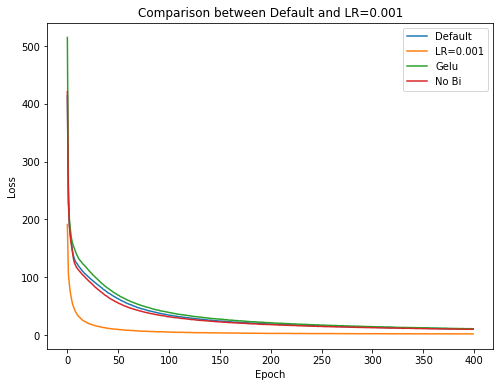

In [11]:
draw_loss_curves([default_loss, lr0001_loss, gelu_loss, nobi_loss], names1)

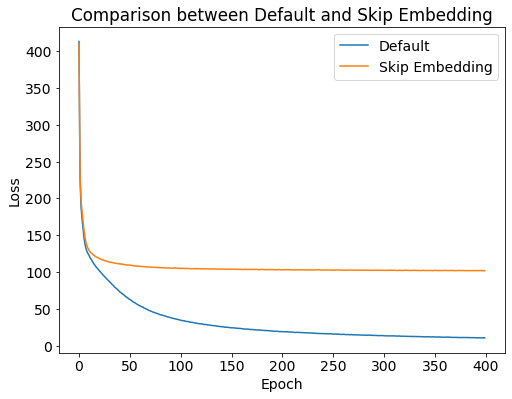

In [12]:
draw_loss_curves([default_loss, skip_e_loss], names2)

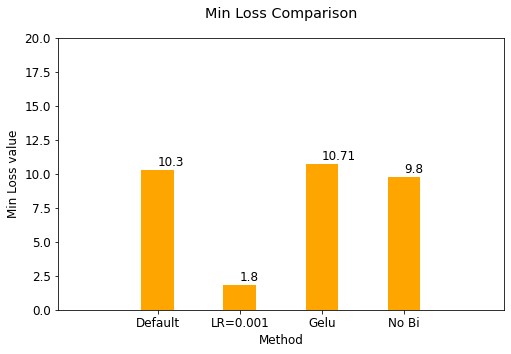

In [13]:
draw_comparison([min_loss_default, min_loss_lr0001, min_loss_gelu, min_loss_nobi], names1, metric="Min Loss", label_off=0.3, ylim=[0, 20])

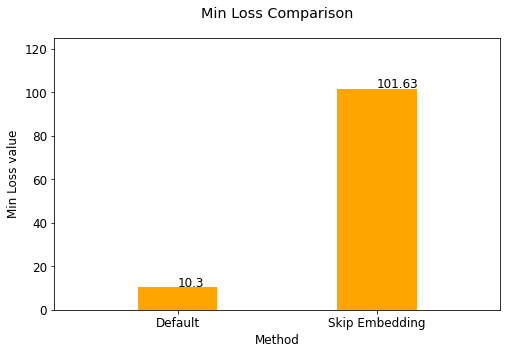

In [14]:
draw_comparison([min_loss_default, min_loss_skip_e], names2, metric="Min Loss", label_off=0.3, ylim=[0, 125])

## NDCG

In [31]:
max_ndcg_paper = 0.1327
max_ndcg_default = 0.1316
max_ndcg_lr0001 = 0.11752
max_ndcg_skip_e = 0.06553
max_ndcg_gelu = 0.12964
max_ndcg_nobi = 0.13223

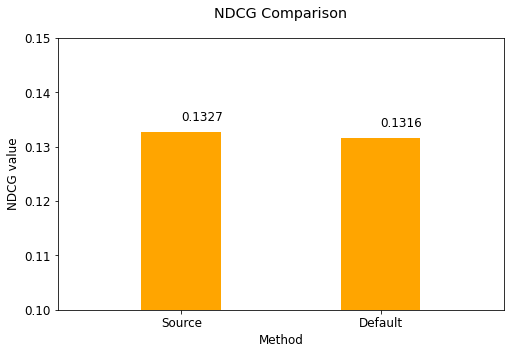

In [32]:
draw_comparison([max_ndcg_paper, max_ndcg_default], names0, metric="NDCG", label_off=0.002, ylim=[0.10, 0.15])

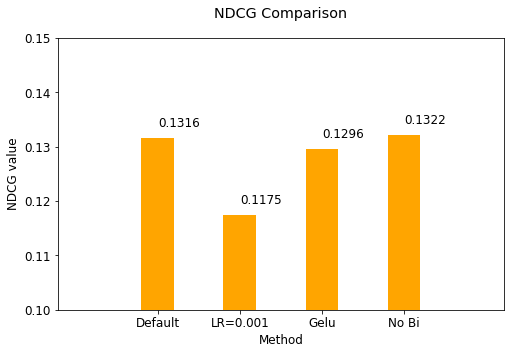

In [33]:
draw_comparison([max_ndcg_default, max_ndcg_lr0001,max_ndcg_gelu, max_ndcg_nobi], names1, metric="NDCG", label_off=0.002, ylim=[0.1, 0.15])

## Recall

In [20]:
max_recall_paper = 0.1569
max_recall_default = 0.15483
max_recall_lr0001 = 0.14118
max_recall_skip_e = 0.06553
max_recall_gelu = 0.15336
max_recall_nobi = 0.15527

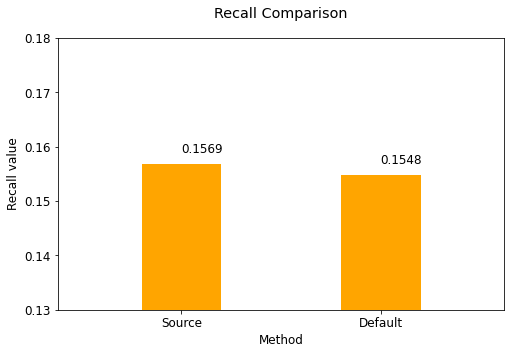

In [34]:
draw_comparison([max_recall_paper, max_recall_default], names0, metric="Recall", label_off=0.002, ylim=[0.13, 0.18])

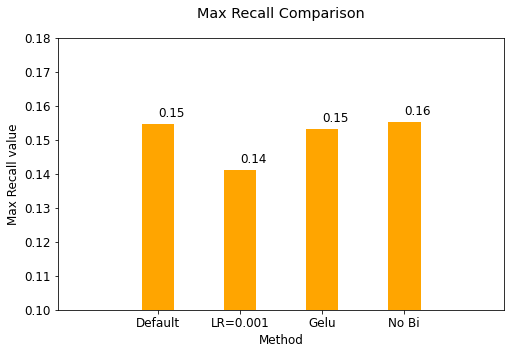

In [16]:
draw_comparison([max_recall_default, max_recall_lr0001, max_recall_gelu, max_recall_nobi], names1, metric="Recall", label_off=0.002, ylim=[0.1, 0.18])

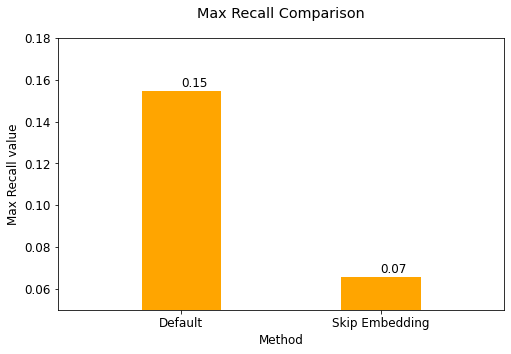

In [17]:
draw_comparison([max_recall_default, max_recall_skip_e], names2, metric="Max Recall", label_off=0.002, ylim=[0.05, 0.18])

In [18]:
# def draw_recall_and_min_loss_comparison(recalls, min_losses, names):
#     X_axis = np.arange(len(names))
#     plt.rcParams.update({'font.size': 12})
#     plt.bar(X_axis - 0.2, recalls, 0.4, label = "Recall")
#     plt.bar(X_axis + 0.2, min_losses, 0.4, label = 'Min Loss')

#     plt.xticks(X_axis, names)
#     plt.xlabel("Experiments")
#     plt.ylabel("Number of Students")
#     plt.title(f"Comparison between {names[0]} and {names[1]}")
#     plt.legend()
#     plt.show()

In [19]:
# draw_recall_and_min_loss_comparison([max_recall_default, max_recall_lr0001], [min_loss_default, min_loss_lr0001], names)